In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
y_train = X_train["label"]
X_train = X_train.drop("label", axis=1)

In [4]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = X_train.values.reshape(-1,28,28,1)
X_train = X_train / 255.0
X_test = X_test.values.reshape(-1,28,28,1)
X_test = X_test / 255.0
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [6]:
y_train_stand = keras.utils.to_categorical(y_train, 10)

In [7]:
y_train_stand.shape

(42000, 10)

In [8]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

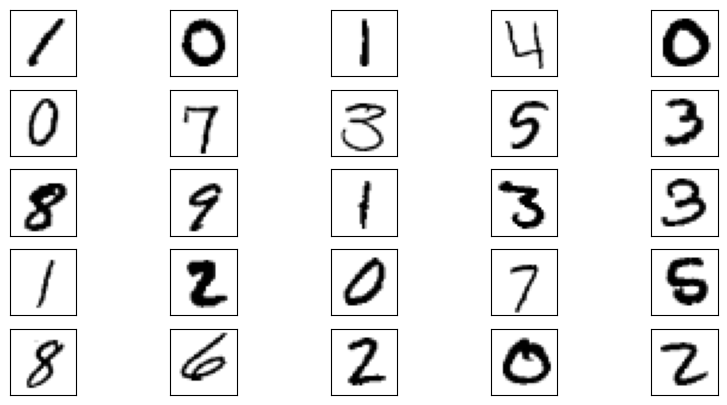

In [9]:
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28,1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
Optimizer = keras.optimizers.Adam(
            learning_rate=0.005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)

In [12]:
model.compile(optimizer=Optimizer,
             loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train_stand, batch_size=32, epochs=30)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2348 - accuracy: 0.9280
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1156 - accuracy: 0.9649
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0887 - accuracy: 0.9725
Epoch 4/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0791 - accuracy: 0.9757
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0627 - accuracy: 0.9804
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0571 - accuracy: 0.9836
Epoch 8/30
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0484 - accuracy: 0.9860
Epoch 9/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0464 - accuracy: 0.9868
Epoch 10/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.043

In [14]:
results = model.predict(X_test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 1s 1ms/step


In [15]:
submission_2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission_2.to_csv("submission_4.csv",index=False)